# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In this situation since the data is related to insurance fraud the who what and how are are in the insurnace industry, the who is mainly insurance professionals,underwriters, as well as risk analysis personel since they will be impacted by the fraud data and subsequent actions that are taken.  The what is relating to their actions when looking at new and existing cases, they should now be more aware of what individuals are at higher risks to commit fraud and should treat these individuals accordingly.  I believe the how would be via a presentation.  The conclusions that had been made via this data story are quite complex as well as potentially unique, so having more control over the sitaution as well as chances for them to ask questions would be best.

# 3. Homework - work with your own data

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # to see all of the columns

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

This dataset is a dataset regarding car claims as well as if they contain insurance fraud or not, it can be found here(https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection)

In [4]:
car_claims_dataset = pd.read_csv("./carclaims.csv")
car_claims_dataset.describe()


,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
car_claims_dataset.iloc[0:5]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
car_claims_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [7]:
car_claims_dataset.iloc[0:5]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [8]:
#find all missing/null values
car_claims_dataset.isnull().sum()
#There are no null values, great

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [9]:
#going to be looking for duplicated policy numbers, since that should be a giveaway if a)the row is duplicated, b) there are two claims with the same policy number
duplicated_policy_numbers = car_claims_dataset["PolicyNumber"][car_claims_dataset["PolicyNumber"].duplicated()]
print(duplicated_policy_numbers)
#there are none, also great!

Series([], Name: PolicyNumber, dtype: int64)


In [10]:
#one hot encoding the following columns, Fault, vehicle category, FraudFound and accident area
one_hot_car_claims = pd.get_dummies(car_claims_dataset,columns=["Fault", "VehicleCategory","FraudFound", "AccidentArea"])
one_hot_car_claims.iloc[0:5]

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,PolicyType,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_No,FraudFound_Yes,AccidentArea_Rural,AccidentArea_Urban
0,Dec,5,Wednesday,Honda,Tuesday,Jan,1,Female,Single,21,Sport - Liability,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,True,False,False,True,False,True,False,False,True
1,Jan,3,Wednesday,Honda,Monday,Jan,4,Male,Single,34,Sport - Collision,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,True,False,False,True,False,True,False,False,True
2,Oct,5,Friday,Honda,Thursday,Nov,2,Male,Married,47,Sport - Collision,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,True,False,False,True,False,True,False,False,True
3,Jun,2,Saturday,Toyota,Friday,Jul,1,Male,Married,65,Sedan - Liability,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,False,True,False,True,False,True,False,True,False
4,Jan,5,Monday,Honda,Tuesday,Feb,2,Female,Single,27,Sport - Collision,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,False,True,False,True,False,True,False,False,True


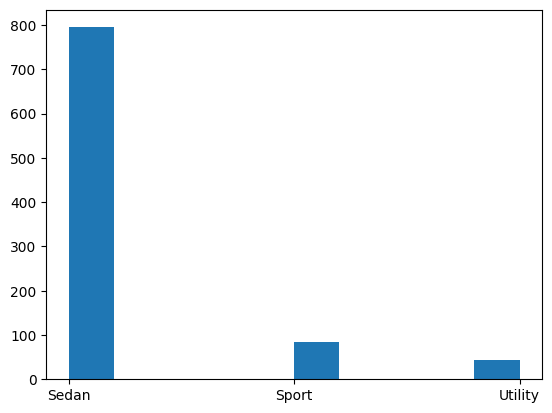

In [11]:
# I am interested in the relationship between the vehicle type as well as if fraud had been found, I will be using a historgram for this
series = car_claims_dataset["VehicleCategory"].where(car_claims_dataset["FraudFound"] == "Yes")
series.dropna(inplace=True)
plt.hist(series)
None

### Conclusions:

- Are the data usable?  If not, find some new data!
    -This data is usable, and has some really interesting columns, mainly the key column of the fraud being reported, in addition to some interesting information such as the vehicle type which could provide some insight as to if certain vehicle types are more likely to induce fraud.  It looks like there may be some correlation between the type sedan and fraud

- Do you need to modify or correct the data in some way?
    - I do think that some fields need to be modified, such as the vehicle price as well as age field.  They are simply ranges and I think taking the mean of the numbers and changing them to be raw numbers would work better, but some of the cost fields do not have a definite end, so taking some prices from the web may be useful.

- Is there any class imbalance?  (Categories that have many more items than other categories).
    -There is no class imbalance.

This dataset is similar to the previous one containing some more potentially useful information, it can be found here(https://data.mendeley.com/datasets/992mh7dk9y/2) 

In [ ]:
#Dataset Number two(https://data.mendeley.com/datasets/D/2/files/a39df307-4896-4bb7-a4b8-f7d7fcdefed1)

insurance_claims = pd.read_csv("./insurance_claims.csv")

In [13]:
print("Insurance Claims Info:")
print(insurance_claims.info())

Insurance Claims Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 

In [14]:
print("Insurance Claims Describe")
insurance_claims.describe()

Insurance Claims Describe


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [15]:
#The incident_date and policy_bind_date fields are both of type object rather than of type datetime, these should be changed to datetime
try:
    insurance_claims["policy_bind_date"] = pd.to_datetime(insurance_claims["policy_bind_date"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for Policy bind date or datetime: {e}")

It worked!


In [16]:
try:
    insurance_claims["incident_date"] = pd.to_datetime(insurance_claims["incident_date"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for Policy bind date or datetime: {e}")

It worked!


In [17]:
#Since there were no errors I want to verify the change had worked
print("incident_date type: " + str(insurance_claims["incident_date"].dtype))
print("policy_bind_date type: " + str(insurance_claims["policy_bind_date"].dtype))

incident_date type: datetime64[ns]
policy_bind_date type: datetime64[ns]


In [18]:
#find all rows with missing or null values and rop them
print(insurance_claims.isnull().sum())
#since it is authorities contacted I think it is fine to leave

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [19]:

# looing for duplicated policy numbers since that is the main one I care about
duplicated_policy_numbers = insurance_claims["policy_number"][insurance_claims["policy_number"].duplicated()]
print(duplicated_policy_numbers)
# there are none, no data to handle or manipulate

Series([], Name: policy_number, dtype: int64)


In [20]:
#finding the mean media and mode of each column that is numberic
print(insurance_claims.select_dtypes(include='number').columns)
#going to get rid of zip code for mean and median but not mode since it may be useful, and going to get rid of _c39 since I am unsure of what it represents
insurance_claims_numberic = insurance_claims.select_dtypes(include='number')
insurance_claims_numberic.columns
insurance_claims_numberic.drop(["_c39", "insured_zip"],axis=1,inplace=True)
insurance_claims_numberic.describe()

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', '_c39'],
      dtype='object')


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [21]:
#Next I will be one hot encoding several variables, indcident severity, fraud reported, collision_type, and sex
one_hot_insurance_claims = pd.get_dummies(insurance_claims,columns=["collision_type", "incident_severity", "insured_sex", "fraud_reported"])


one_hot_insurance_claims.iloc[0:5]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,insured_sex_FEMALE,insured_sex_MALE,fraud_reported_N,fraud_reported_Y
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,NaN,False,False,False,True,True,False,False,False,False,True,False,True
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,NaN,True,False,False,False,False,True,False,False,False,True,False,True
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,NaN,False,False,True,False,False,True,False,False,True,False,True,False
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,NaN,False,True,False,False,True,False,False,False,True,False,False,True
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,NaN,True,False,False,False,False,True,False,False,False,True,True,False


In [22]:
# I had noticed that there is a colision type_? column, I will be dropping any columns that contain a "?" in colision type and then re running one hot encoding, as well as dropping _c39
#insurance_claims.drop("_c39",axis=1,inplace=True)
insurance_claims["collision_type"].dtype
insurance_claims = insurance_claims[insurance_claims['collision_type'] != '?']
one_hot_insurance_claims = pd.get_dummies(insurance_claims,columns=["collision_type", "incident_severity", "insured_sex", "fraud_reported"])
one_hot_insurance_claims.iloc[0:5]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,insured_sex_FEMALE,insured_sex_MALE,fraud_reported_N,fraud_reported_Y
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,NaN,False,False,True,True,False,False,False,True,False,True
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,NaN,False,True,False,False,True,False,True,False,True,False
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,NaN,True,False,False,True,False,False,True,False,False,True
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,NaN,False,True,False,True,False,False,True,False,False,True
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,NaN,True,False,False,False,True,False,False,True,True,False


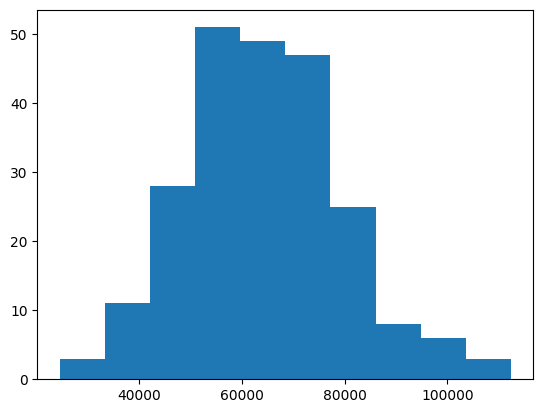

In [ ]:
price = insurance_claims["total_claim_amount"].where(insurance_claims["fraud_reported"] == "Y")
price.dropna(inplace=True)
plt.hist(price)
None

### Conclusions:

- Are the data usable?  If not, find some new data!
    -This data is more usable than the last set, with most of the columns being of type int as well as clear numbers for a lot of the items.  In addition there is less junk data with some potentially interesting fields such as education level and the amount of fraud reported depending on education level

- Do you need to modify or correct the data in some way?
    - This data requires much less masaging, with one hot encoding there seems to be a lot of value in the data as it currently is.

- Is there any class imbalance?  (Categories that have many more items than other categories).
    -There is no class imbalance.

The last dataset I will be using can be found here: https://www.kaggle.com/datasets/mastmustu/insurance-claims-fraud-data/data?select=insurance_data.csv, I will be using it at the customer level, I had selected images last semester but in this envoirnment it does not seem as doable since I would have to do some computer vision stuff that seems out of scope, I will be using this to see if there are different levels of fruad across different domains more frequently than others.

In [24]:
general_fraud_data = pd.read_csv("./insurance_data.csv")
general_fraud_data.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,7.052882e+07,0.699100,0.692800,11.604000
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,3.451879e+07,0.458672,0.461356,6.877101
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,4.071761e+07,0.000000,0.000000,6.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,7.036614e+07,1.000000,1.000000,12.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000638e+08,1.000000,1.000000,18.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.299981e+08,1.000000,1.000000,23.000000


In [25]:
general_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [26]:
#look to see if the data is null
print(general_fraud_data.isnull().sum())

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

In [27]:
#looks like vendor_id, ADDRESS_LINE2  city, CUSTOMER_EDUCATION_LEVEL, and AUTHORITY_CONTACTED have quite a bit of null values   
general_fraud_data_non_null = general_fraud_data.fillna(0,inplace=False)
general_fraud_data_non_null.iloc[0:5]
#since we already have data on the education level from a previous dataset we do not need to fill it with anything meaninfull, may be a good idea to somehow agregate the two in the future,
#in addition we also have dataset on if the police had been called or not from a previous dataset, so I am not too worried about the data being here

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,0,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,0,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,0,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,0,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [28]:
#general_fraud_data_non_null.drop("CUSTOMER_NAME",axis=1,inplace=True)
#general_fraud_data_non_null.drop("ROUTING_NUMBER", axis=1,inplace=True)
#general_fraud_data_non_null.drop("SSN", axis=1,inplace=True)
#Customer name, SSN, and routing number are not really needed, already ran once so commented out, leaving code for visibility

In [29]:
#checking for duplicated customer ids
dupluc_CID = general_fraud_data_non_null["CUSTOMER_ID"][general_fraud_data_non_null["CUSTOMER_ID"].duplicated()]
print(dupluc_CID)
#no dupes, great!

Series([], Name: CUSTOMER_ID, dtype: object)


In [30]:
try:
    general_fraud_data_non_null["POLICY_EFF_DT"] = pd.to_datetime(general_fraud_data_non_null["POLICY_EFF_DT"],format='%Y-%m-%d')
    general_fraud_data_non_null["LOSS_DT"] = pd.to_datetime(general_fraud_data_non_null["LOSS_DT"], format='%Y-%m-%d')
    general_fraud_data_non_null["REPORT_DT"] = pd.to_datetime(general_fraud_data_non_null["REPORT_DT"], format='%Y-%m-%d')
    #this one has the hours minutes and seconds time, so we will be changing it, might also be worth using posix or f64 time since those are ints and probably interpreted a bit better
    general_fraud_data_non_null["TXN_DATE_TIME"] = pd.to_datetime(general_fraud_data_non_null["TXN_DATE_TIME"], format='%Y-%m-%d %H:%M:%S')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for Policy bind date or datetime: {e}")


It worked!


In [31]:
general_fraud_data_non_null.info()
#changed the dates to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  datetime64[ns]
 7   INSURANCE_TYPE            10000 non-null  object        
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  ADDRESS_LINE2      

In [32]:
#getting the mean median and mode of the numeric columns
general_f_d_num_only = general_fraud_data_non_null.select_dtypes(include='number')
general_f_d_num_only.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,7.052882e+07,0.699100,0.692800,11.604000
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,3.451879e+07,0.458672,0.461356,6.877101
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,4.071761e+07,0.000000,0.000000,6.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,7.036614e+07,1.000000,1.000000,12.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000638e+08,1.000000,1.000000,18.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.299981e+08,1.000000,1.000000,23.000000


In [33]:
"EMPLOYMENT_STATUS", "INSURANCE_TYPE", "SOCIAL_CLASS", "INCIDENT_SEVERITY" , "AUTHORITY_CONTACTED" , "EMPLOYMENT_STATUS" ,"RISK_SEGMENTATION"
general_fraud_one_hot = pd.get_dummies(general_fraud_data_non_null,columns=["EMPLOYMENT_STATUS", "INSURANCE_TYPE", "SOCIAL_CLASS", "INCIDENT_SEVERITY" , "AUTHORITY_CONTACTED" , "EMPLOYMENT_STATUS" ,"RISK_SEGMENTATION"])

In [34]:
general_fraud_one_hot.iloc[0:5]

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,NO_OF_FAMILY_MEMBERS,HOUSE_TYPE,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,EMPLOYMENT_STATUS_N,EMPLOYMENT_STATUS_Y,INSURANCE_TYPE_Health,INSURANCE_TYPE_Life,INSURANCE_TYPE_Mobile,INSURANCE_TYPE_Motor,INSURANCE_TYPE_Property,INSURANCE_TYPE_Travel,SOCIAL_CLASS_HI,SOCIAL_CLASS_LI,SOCIAL_CLASS_MI,INCIDENT_SEVERITY_Major Loss,INCIDENT_SEVERITY_Minor Loss,INCIDENT_SEVERITY_Total Loss,AUTHORITY_CONTACTED_0,AUTHORITY_CONTACTED_Ambulance,AUTHORITY_CONTACTED_Other,AUTHORITY_CONTACTED_Police,EMPLOYMENT_STATUS_N,EMPLOYMENT_STATUS_Y,RISK_SEGMENTATION_H,RISK_SEGMENTATION_L,RISK_SEGMENTATION_M
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,3,Own,109134974,HXJP58258181908465,Bachelor,A,0,1,GA,Savannah,4,AGENT00413,VNDR00556,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,True,False
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,0,Arvada,CO,80005,685-33-3536,N,61,80,4,Rent,40125819,JUND46859540983731,Bachelor,A,1,0,AL,Montgomery,0,AGENT00769,VNDR00592,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,157.24,13000,Lashawn Engles,637 Britannia Drive,0,Vallejo,CA,94591,378-36-0672,N,47,68,6,Rent,99513168,WGZZ90128415227650,PhD,A,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,172.87,16000,Steven Bassett,2803 River Drive,0,Thunderbolt,GA,31404,669-92-1861,Y,36,16,7,Mortgage,18429110,WIKE91555436351397,Masters,A,0,0,GA,Savannah,12,AGENT00278,VNDR00075,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,88.53,3000,Jason Rodriguez,7573 National Drive,0,Livermore,CA,94550,703-40-1033,Y,51,16,2,Rent,70752391,VYJW71311537294027,Masters,A,0,1,TN,Nashville,18,AGENT00636,VNDR00472,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True


In [35]:
#going to drop rows where AUTHORITY_CONTACTED_0 is true
#general_fraud_one_hot = general_fraud_one_hot[general_fraud_one_hot["AUTHORITY_CONTACTED_0"] != True]
#general_fraud_one_hot.drop("AUTHORITY_CONTACTED_0",axis=1,inplace=True)
general_fraud_one_hot.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'PREMIUM_AMOUNT',
       'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2',
       'CITY', 'STATE', 'POSTAL_CODE', 'SSN', 'MARITAL_STATUS', 'AGE',
       'TENURE', 'NO_OF_FAMILY_MEMBERS', 'HOUSE_TYPE', 'ROUTING_NUMBER',
       'ACCT_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'ANY_INJURY',
       'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_HOUR_OF_THE_DAY', 'AGENT_ID', 'VENDOR_ID',
       'EMPLOYMENT_STATUS_N', 'EMPLOYMENT_STATUS_Y', 'INSURANCE_TYPE_Health',
       'INSURANCE_TYPE_Life', 'INSURANCE_TYPE_Mobile', 'INSURANCE_TYPE_Motor',
       'INSURANCE_TYPE_Property', 'INSURANCE_TYPE_Travel', 'SOCIAL_CLASS_HI',
       'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI', 'INCIDENT_SEVERITY_Major Loss',
       'INCIDENT_SEVERITY_Minor Loss', 'INCIDENT_SEVERITY_Total Loss',
       'AUTHORITY_CONTACTED_0', 'AUTHORITY_CONTACT

In [36]:
#getting rid of the spaces in column names, they can be a pain to deal with
general_fraud_one_hot = general_fraud_one_hot.rename(columns={"INCIDENT_SEVERITY_Major Loss" : "INCIDENT_SEVERITY_Major_Loss" , "INCIDENT_SEVERITY_Total Loss" : "INCIDENT_SEVERITY_Total_Loss", "INCIDENT_SEVERITY_Minor Loss" : "INCIDENT_SEVERITY_Minor_Loss"})
general_fraud_one_hot.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'PREMIUM_AMOUNT',
       'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2',
       'CITY', 'STATE', 'POSTAL_CODE', 'SSN', 'MARITAL_STATUS', 'AGE',
       'TENURE', 'NO_OF_FAMILY_MEMBERS', 'HOUSE_TYPE', 'ROUTING_NUMBER',
       'ACCT_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'ANY_INJURY',
       'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_HOUR_OF_THE_DAY', 'AGENT_ID', 'VENDOR_ID',
       'EMPLOYMENT_STATUS_N', 'EMPLOYMENT_STATUS_Y', 'INSURANCE_TYPE_Health',
       'INSURANCE_TYPE_Life', 'INSURANCE_TYPE_Mobile', 'INSURANCE_TYPE_Motor',
       'INSURANCE_TYPE_Property', 'INSURANCE_TYPE_Travel', 'SOCIAL_CLASS_HI',
       'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI', 'INCIDENT_SEVERITY_Major_Loss',
       'INCIDENT_SEVERITY_Minor_Loss', 'INCIDENT_SEVERITY_Total_Loss',
       'AUTHORITY_CONTACTED_0', 'AUTHORITY_CONTACT

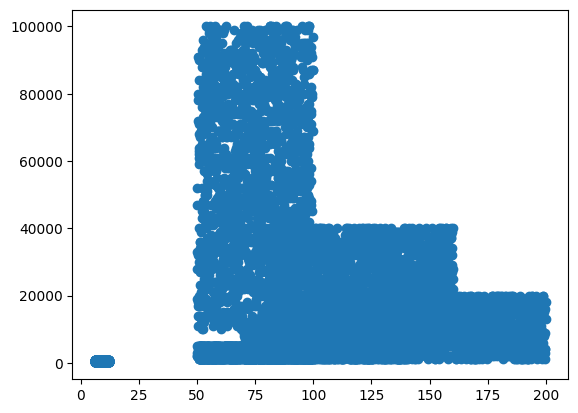

In [37]:
#going to make a graph of premium amounts as well as claim amounts since we know all of these contain fraud
plt.scatter(general_fraud_one_hot['PREMIUM_AMOUNT'],general_fraud_one_hot['CLAIM_AMOUNT'])
None

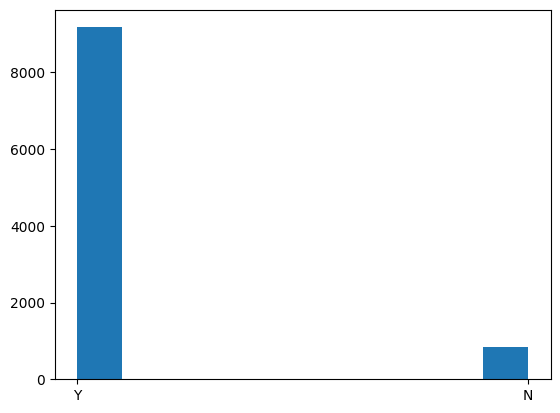

In [38]:
plt.hist(general_fraud_data["EMPLOYMENT_STATUS"])
None
#wanted to see a quick histogram of data regarding employment status and fraud committed.

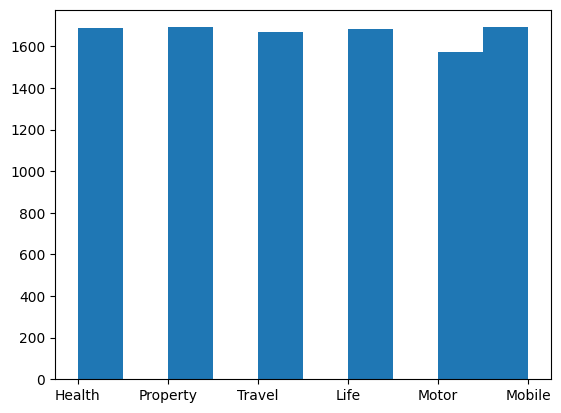

In [39]:
plt.hist(general_fraud_data["INSURANCE_TYPE"])
None
#looks like all are equally represented here, nice.

### Conclusions:

- Are the data usable?  If not, find some new data!
    -This data is usable, and has some really interesting columns, that could work well with the other data as well as provide more insights.  This data also contains exclusively fradulent cases as well as data regarding the risk, and social class of the person making the claim, it serves as a nice addition as well as a good replacement for the image data that I had found last semester

- Do you need to modify or correct the data in some way?
    - Aside from the work I had done it does not seem like there needs to be much work done when it comes to working with the data more, I had already converted the dates and in addtion had found some new and interesting fields.

- Is there any class imbalance?  (Categories that have many more items than other categories).
    -There is no class imbalance.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

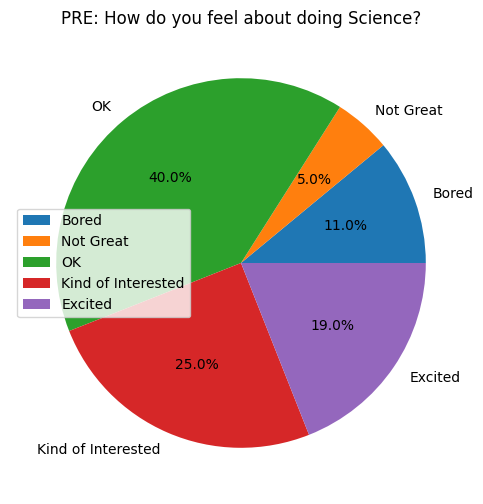

In [49]:
plt.figure(figsize=(10, 6))
labels = ["Bored", "Not Great", "OK", "Kind of Interested", "Excited"]
sizes = [11,5,40,25,19]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.legend()
plt.title("PRE: How do you feel about doing Science?")
None